<a href="https://colab.research.google.com/github/Lateefacs/AI-Projects/blob/main/drug_SideEffect_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Druge Side Effect Detection Model**
The input of this model is drug review, the model expected to find out the sideffect

In [17]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [18]:
# Uploading Data
df = pd.read_csv("/content/sample_data/drugsComTrain_raw.csv")
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [19]:
#new dataset
df=df[['review','condition']]
df.head()

,review,condition
0,"""It has no side effect, I take it in combinati...",Left Ventricular Dysfunction
1,"""My son is halfway through his fourth week of ...",ADHD
2,"""I used to take another oral contraceptive, wh...",Birth Control
3,"""This is my first time using any form of birth...",Birth Control
4,"""Suboxone has completely turned my life around...",Opiate Dependence


In [20]:
counts = df['condition'].value_counts()
print(counts)

Birth Control                                              28788
Depression                                                  9069
Pain                                                        6145
Anxiety                                                     5904
Acne                                                        5588
                                                           ...  
Dissociative Identity Disorde                                  1
Hydrocephalus                                                  1
Hyperlipoproteinemia Type III, Elevated beta-VLDL   IDL        1
Q Feve                                                         1
Neutropenia                                                    1
Name: condition, Length: 884, dtype: int64


In [21]:
print(df['condition'])

0         Left Ventricular Dysfunction
1                                 ADHD
2                        Birth Control
3                        Birth Control
4                    Opiate Dependence
                      ...             
161292              Alcohol Dependence
161293                 Nausea/Vomiting
161294            Rheumatoid Arthritis
161295             Underactive Thyroid
161296           Constipation, Chronic
Name: condition, Length: 161297, dtype: object


In [22]:
df = df[~df['condition'].isin(counts[counts < 4000].index)] #make column 'codition' in list then filtring it
df['condition'].value_counts()

Birth Control      28788
Depression          9069
Pain                6145
Anxiety             5904
Acne                5588
Bipolar Disorde     4224
Name: condition, dtype: int64

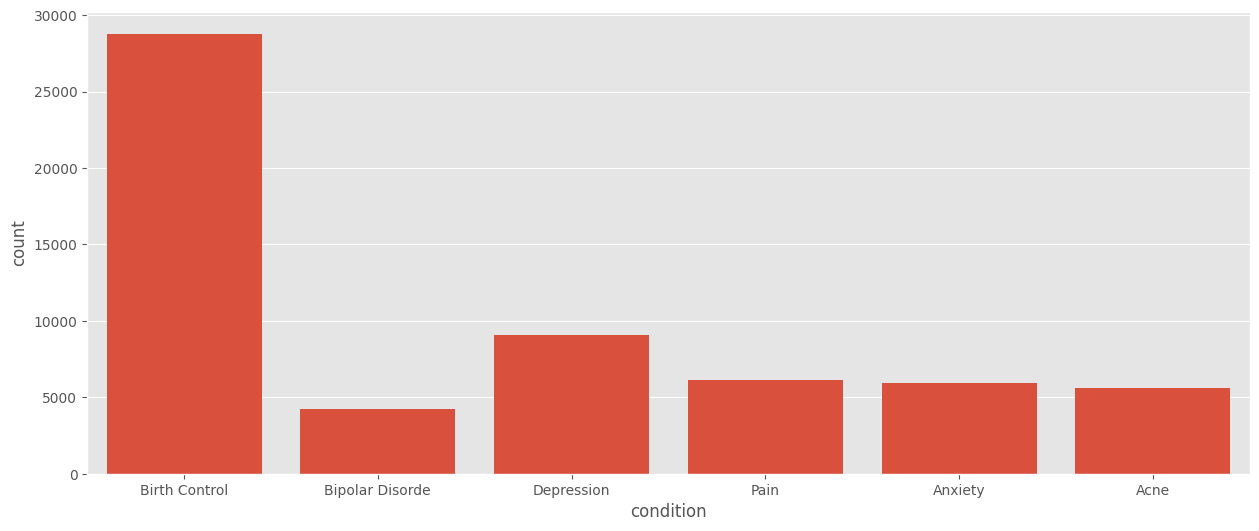

In [23]:
plt.figure(figsize=(15,6))
plt.style.use('ggplot')
sns.countplot(x='condition', data = df ,saturation=0.90)
plt.show()

In [24]:
# dropping the missing data
print(df.isna().sum())
print(df.shape)
df.dropna(axis=0,inplace=True)
print(df.shape)

review         0
condition    899
dtype: int64
(60617, 2)
(59718, 2)


In [25]:
blanks = []  # start with an empty list

for i in df.itertuples():  # iterate over the DataFrame
    if type(i)==str:            # avoid NaN values, if there a string
        if i.isspace():         # test 'review' for whitespace, isspace (if there a space)
            blanks.append(i)     # add matching index numbers to the list,  save the index num(which is same as row number) in the empty(or have space) cell

print(len(blanks), 'blanks: ', blanks)

0 blanks:  []


In [26]:
print(df['condition'].value_counts())
print('\n\nNumber of classes = ', len(df['condition'].value_counts()))

Birth Control      28788
Depression          9069
Pain                6145
Anxiety             5904
Acne                5588
Bipolar Disorde     4224
Name: condition, dtype: int64


Number of classes =  6


In [27]:
samples = 9069 # to handle imbalanced data we will reduce the no. of samples to be 9069 at most in a class
df_BirthControl  = df[df.condition=='Birth Control'].sample(samples, random_state=2022)
df = df[df['condition'] != 'Birth Control']
df = pd.concat([df, df_BirthControl], axis=0).reset_index(drop=True)

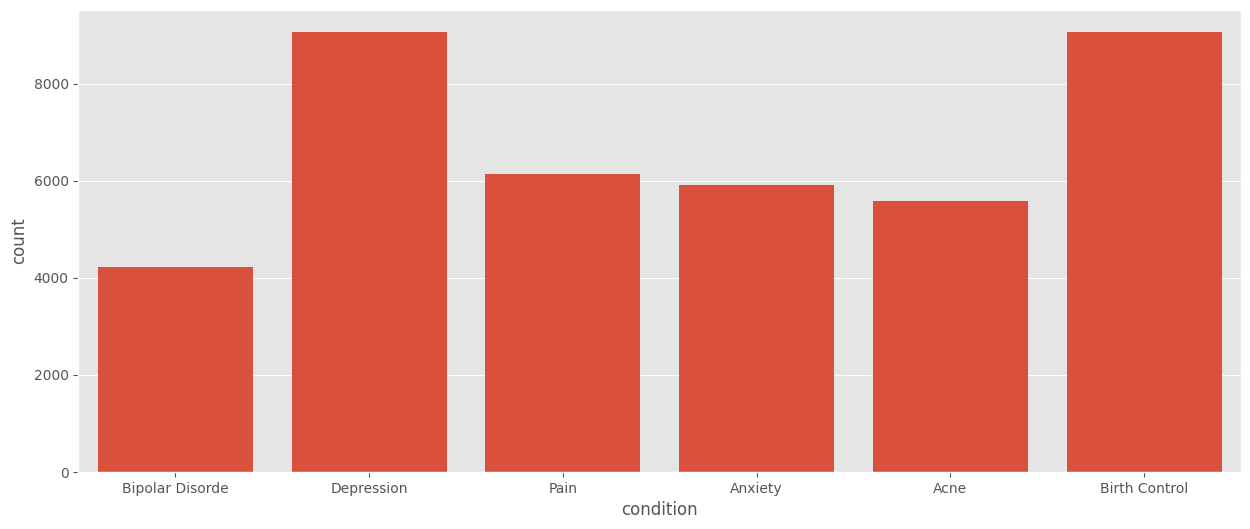

In [28]:
plt.figure(figsize=(15,6))
plt.style.use('ggplot')
sns.countplot(x='condition', data = df ,saturation=0.90)
plt.show()

In [29]:
df.shape

(39999, 2)

In [30]:
#Split the data into train & test sets
features = df.review
labels = df.condition

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20 , stratify=labels ,random_state=42)

In [31]:
#preprocess text to remove stop words, lemmatize
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [32]:
df["preprocessed_review"] = df.review.apply(preprocess)

In [33]:
df

,review,condition,preprocessed_review
0,"""Abilify changed my life. There is hope. I was...",Bipolar Disorde,Abilify change life hope Zoloft Clonidine star...
1,"""I have taken anti-depressants for years, with...",Depression,take anti depressant year improvement moderate...
2,"""I&#039;ve been on every medicine under the su...",Bipolar Disorde,I&#039;ve medicine sun manage hypomania mania ...
3,"""1 week on Zoloft for anxiety and mood swings....",Depression,1 week Zoloft anxiety mood swing 50 mg morning...
4,"""I am 30 years old. I had a multiple composite...",Pain,30 year old multiple composite spinal injury 1...
...,...,...,...
39994,"""I got this bar almost exactly a year ago and ...",Birth Control,get bar exactly year ago gain 20lb don&#039;t ...
39995,"""I had this implant for 2 yrs now the thing I ...",Birth Control,implant 2 yr thing notice self gain lot weight...
39996,"""I just got my MIrena put in on the 28th of Se...",Birth Control,get MIrena 28th Sept insertion pain 20 child h...
39997,"""I got my implanon inserted in feb of 2011. At...",Birth Control,get implanon insert feb 2011 perfect wasn&#039...


**Linear Support Vector Classification**

In [34]:
# Linear SVC
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])


In [35]:
text_clf_lsvc.fit(X_train, y_train)
predictions = text_clf_lsvc.predict(X_test)

In [36]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[1044    1    0   55   12    5]
 [   2  923   16   10  204   26]
 [   2   36  683    6  109    9]
 [  29    5    3 1762    9    6]
 [   4  113   65    6 1600   26]
 [   0   18    6    5   21 1179]]


In [37]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

                 precision    recall  f1-score   support

           Acne       0.97      0.93      0.95      1117
        Anxiety       0.84      0.78      0.81      1181
Bipolar Disorde       0.88      0.81      0.84       845
  Birth Control       0.96      0.97      0.96      1814
     Depression       0.82      0.88      0.85      1814
           Pain       0.94      0.96      0.95      1229

       accuracy                           0.90      8000
      macro avg       0.90      0.89      0.89      8000
   weighted avg       0.90      0.90      0.90      8000



In [38]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.898875


**Trying the model with pre processed text**

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_review,
    df.condition,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.condition
)

In [40]:
#1. create a pipeline object
text_clf_lsvc_2 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC()),
])

#2. fit with X_train and y_train
text_clf_lsvc_2.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred = text_clf_lsvc_2.predict(X_test)

#4. print the classfication report
print(metrics.classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

           Acne       0.95      0.94      0.95      1117
        Anxiety       0.84      0.78      0.81      1181
Bipolar Disorde       0.85      0.83      0.84       845
  Birth Control       0.96      0.96      0.96      1814
     Depression       0.83      0.87      0.84      1814
           Pain       0.93      0.95      0.94      1229

       accuracy                           0.90      8000
      macro avg       0.89      0.89      0.89      8000
   weighted avg       0.90      0.90      0.90      8000



In [41]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,y_pred))

0.8955


**Feature Extraction (N-grams)**

In [42]:
#1. create a pipeline object
from sklearn.feature_extraction.text import CountVectorizer

clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 3))),        #using the ngram_range parameter
    ('clf', LinearSVC())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(metrics.classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


                 precision    recall  f1-score   support

           Acne       0.95      0.96      0.96      1117
        Anxiety       0.84      0.82      0.83      1181
Bipolar Disorde       0.88      0.86      0.87       845
  Birth Control       0.97      0.95      0.96      1814
     Depression       0.86      0.88      0.87      1814
           Pain       0.92      0.94      0.93      1229

       accuracy                           0.91      8000
      macro avg       0.90      0.90      0.90      8000
   weighted avg       0.91      0.91      0.91      8000



In [43]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,y_pred))

0.9065


**Naive Bayes classifier**

In [44]:
from sklearn.naive_bayes import MultinomialNB
clf2 = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 3))),        #using the ngram_range parameter
    ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf2.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf2.predict(X_test)


#4. print the classfication report
print(metrics.classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

           Acne       0.98      0.91      0.95      1117
        Anxiety       0.94      0.61      0.74      1181
Bipolar Disorde       0.99      0.57      0.73       845
  Birth Control       0.92      0.99      0.95      1814
     Depression       0.67      0.97      0.79      1814
           Pain       0.98      0.89      0.93      1229

       accuracy                           0.86      8000
      macro avg       0.91      0.82      0.85      8000
   weighted avg       0.89      0.86      0.86      8000



In [45]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,y_pred))

0.859125


Save the best model

In [46]:
import joblib
joblib.dump(clf, 'Drugmodel.h5')

['Drugmodel.h5']

In [47]:
model = joblib.load('Drugmodel.h5')

Test the model with 3 reviews <br>
correct labels:

1.   Pain
2.   Depression
3.   Anxiety



In [53]:
text = ["Been on 30mg Cymbalta for 2 weeks. Started getting relief by the 2nd day. Am 58 year old male with spinal stenosis, degenerative disc disease, and spondy. Plan was to go to 60mg but I am getting enough relief at 30mg. I believe I will try to stay on that dose to minimize side effects. Some constipation, difficult reaching orgasm, some night sweats and minor headaches. Oh, insomnia if I took it at night.  I had samples of this medicine for 6 months but delayed starting it because of horror stories on the internet. Pain was ruining my life so this medicine seems to be the best option.",
        "I am a 22 year old female college student. I wanted to write this because when I was at my lowest of low when I felt absolutely hopeless... these positive reviews are what got me through the day. I experienced a lot of change.  I was also in a relationship that made me unhappy. I stopped doing the things I liked to do such as run, party, work, hang out with friends etc. In result, I never had energy. I constantly felt guilty. I cried everyday, sometimes multiple times of day. I went to group therapy. I dropped 10lbs in two weeks. I eventually got on this medicine &amp; the first 4 days felt crazy &amp; tired! TAKE AT NIGHT. Give this medicine time! Now 3 weeks in I am back to myself and am truly happy! Keep your head up.",
        "I did not like this medication. For anxiety, I have also tried Hydroxyzine (Atarax). I guess this is just my personal body chemistry but I actually prefer Atarax to this unlike most people. This made me VERY lightheaded and dizzy. I can&#039;t exactly remember the effect it had on anxiety, I think it may have helped a little."]
preprocessed_text = [preprocess(t) for t in text]

In [49]:
model.predict(preprocessed_text)

array(['Pain', 'Depression', 'Anxiety'], dtype=object)